# WeatherPy
----
The below study looks at the correlation of latitude and various weather measurements including max temp, cloudiness, and wind speed.  The data consists of over 500 randomly selected cities from around the world.  The data is broken up by hemisphere in the latter studies. 


#### Analysis and Observations
- The stongest correlation over the study of data was that for the latitude and max temps in the Northern Hemisphere. The r-value was .68 for this study, which is the strongest postiive correlation we saw. 


- General observations were as expected with the max temperatures decreasing as you moved away from the equator. 


- Wind speeds and cloud cover have a very week, if none, correlation to latitude in both the Northern and Southern hemispheres. The data in these studies had clusters around the common outputs of 100% cloudy, 0% cloudy, and wind speeds less than 10mph. 

In [66]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from scipy.stats import linregress
from sklearn import datasets


api_key="e9f34fe30c3508b1804ca865ed96b3b4"
temp_units="imperial"

In [49]:
# Create an output
output_data_file = "../output_data/weather_df.csv"

#Set Latitudes and Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [13]:
#Create lists to hold values
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)

# Find cities from citipy
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Make sure you have at least 500 cities
len(cities)

532

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# set lists for the dataframe
city_list = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_list.append(city)
        else:
            count_one += 1
            city_list.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | mehamn
City not found. Skipping...
Processing Record 5 of Set 1 | lagoa
Processing Record 6 of Set 1 | mys shmidta
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | tinskoy
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | dingle
Processing Record 13 of Set 1 | farafangana
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | saint-augustin
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | ballina
Processing Record 18 of Set 1 | comodoro rivadavia
Processing Record 19 of Set 1 | half moon bay
Processing Record 20 of Set 1 | atar
Processing Record 21 of Set 1 | palana
Processing Record 22 of Set 1 | albany
City not found. S

Processing Record 42 of Set 4 | laguna
Processing Record 43 of Set 4 | sarangani
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | kashi
Processing Record 46 of Set 4 | weinsberg
Processing Record 47 of Set 4 | ancud
Processing Record 48 of Set 4 | katsuura
Processing Record 49 of Set 4 | puerto ayora
Processing Record 1 of Set 5 | severo-kurilsk
Processing Record 2 of Set 5 | coihaique
Processing Record 3 of Set 5 | port blair
Processing Record 4 of Set 5 | izyaslav
Processing Record 5 of Set 5 | emba
Processing Record 6 of Set 5 | susangerd
Processing Record 7 of Set 5 | bethel
City not found. Skipping...
Processing Record 8 of Set 5 | jackson
Processing Record 9 of Set 5 | haines junction
Processing Record 10 of Set 5 | sitka
Processing Record 11 of Set 5 | naryan-mar
Processing Record 12 of Set 5 | caetite
Processing Record 13 of Set 5 | fairbanks
City not found. Skipping...
Processing Record 14 of Set 5 | mar del plata
Processing Record 15 of Set 5 | lefka
P

Processing Record 28 of Set 8 | black river
Processing Record 29 of Set 8 | krasnoselkup
Processing Record 30 of Set 8 | amarante do maranhao
Processing Record 31 of Set 8 | sosnovo-ozerskoye
Processing Record 32 of Set 8 | zhanaozen
Processing Record 33 of Set 8 | catumbela
Processing Record 34 of Set 8 | garissa
Processing Record 35 of Set 8 | zhuhai
Processing Record 36 of Set 8 | yuli
Processing Record 37 of Set 8 | casablanca
Processing Record 38 of Set 8 | bambanglipuro
Processing Record 39 of Set 8 | tahta
City not found. Skipping...
Processing Record 40 of Set 8 | pangnirtung
Processing Record 41 of Set 8 | trelew
Processing Record 42 of Set 8 | hinesburg
City not found. Skipping...
Processing Record 43 of Set 8 | margate
Processing Record 44 of Set 8 | lavrentiya
Processing Record 45 of Set 8 | ambon
Processing Record 46 of Set 8 | kununurra
Processing Record 47 of Set 8 | airai
Processing Record 48 of Set 8 | jaicos
Processing Record 49 of Set 8 | paciran
Processing Record 1 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
weather = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}


In [20]:
#Create Data Frame
weather_dataframe = pd.DataFrame(weather)

In [21]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,butaritari,1,KI,1601254150,80,3.07,172.79,82.11,17.13
1,bengkulu,99,ID,1601254151,76,-3.80,102.27,79.83,6.85
2,rikitea,0,PF,1601254151,78,-23.12,-134.97,74.62,11.88
3,mehamn,70,NO,1601254152,82,71.04,27.85,40.05,12.62
4,lagoa,50,PT,1601254153,88,39.05,-27.98,70.21,6.33


In [88]:
# make csv file
weather_dataframe.to_csv(output_data_file)

In [89]:
weather_dataframe.count()


City          473
Cloudiness    473
Country       473
Date          473
Humidity      473
Lat           473
Lng           473
Max Temp      473
Wind Speed    473
dtype: int64

In [26]:
weather_dataframe.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,473.000000,4.730000e+02,473.000000,473.000000,473.000000,473.000000,473.000000
mean,49.245243,1.601254e+09,73.737844,20.078330,22.385137,62.912072,7.982495
std,40.481204,9.077672e+01,19.630134,33.298539,85.020448,15.520728,5.701459
min,0.000000,1.601254e+09,10.000000,-54.800000,-179.170000,13.210000,0.160000
25%,1.000000,1.601254e+09,64.000000,-7.030000,-46.650000,50.000000,3.890000
50%,44.000000,1.601254e+09,79.000000,22.240000,26.820000,64.530000,6.930000
75%,90.000000,1.601254e+09,88.000000,47.870000,83.270000,76.440000,10.330000
max,100.000000,1.601254e+09,100.000000,78.220000,179.320000,96.800000,43.460000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [32]:
high_humidity=weather_dataframe.loc[weather_dataframe["Humidity"]>100]
high_humidity

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [17]:
#  Get the indices of cities that have humidity over 100%.

#There was no cities with humidity over 100

Int64Index([], dtype='int64')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

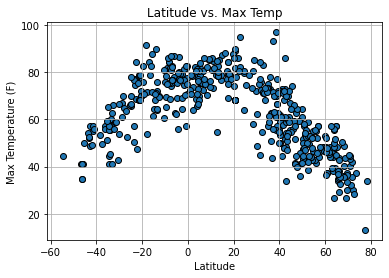

<Figure size 432x288 with 0 Axes>

In [93]:

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black")
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",)
plt.show()
plt.savefig("../output_data/LatTemp.png")



The above plot is showing the relationship between Latitude and Max Temperature. As expected, the closer to the equator (0 latitude), the warmer the max temp is. 

## Latitude vs. Humidity Plot

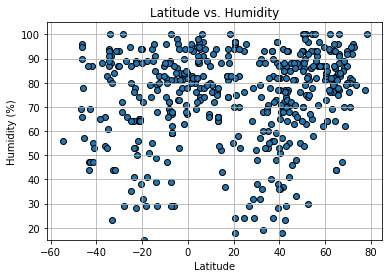

<Figure size 432x288 with 0 Axes>

In [94]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both")
plt.show()
plt.savefig("../output_data/LatHum.png")



The above plot is showing the relationship between Latitude and Humidity. What we can see from the scatter plot, is that there does not seem to be a coorrelation between latitude and humidity. Regardless of latitude, it seems that most areas have a high humidity rate. 

## Latitude vs. Cloudiness Plot

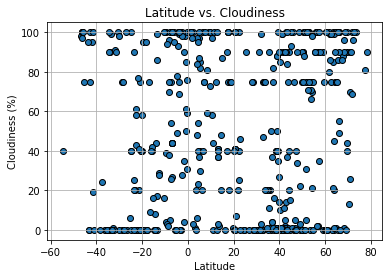

<Figure size 432x288 with 0 Axes>

In [95]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",)
plt.show()
plt.savefig("../output_data/LatCloud.png")



The above scatterplot is showing the potential relationship between latitude and cloudiness.  What we can see is that there is alot of clustering around the 100% and 0% for cloudiness.  This could be due to reporting.  If it is cloudy or if there is no clouds, it is a clear cut decision; however, mostly cloudy or partly cloudy can be left up to the opinion of the person reporting. 

## Latitude vs. Wind Speed Plot

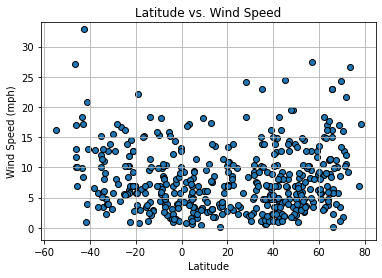

<Figure size 432x288 with 0 Axes>

In [97]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"], edgecolors="black")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both")
plt.show()
plt.savefig("../output_data/LatWind.png")



The above scatterplot is showing a potential relationship between latitude and wind speed.  

## Linear Regression

In [58]:
#Create northern and southern hemisphere data
northern_hem=weather_dataframe.loc[weather_dataframe["Lat"]>=0]
southern_hem=weather_dataframe.loc[weather_dataframe["Lat"]<=0]

In [59]:
northern_hem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,butaritari,1,KI,1601254150,80,3.07,172.79,82.11,17.13
3,mehamn,70,NO,1601254152,82,71.04,27.85,40.05,12.62
4,lagoa,50,PT,1601254153,88,39.05,-27.98,70.21,6.33
5,mys shmidta,99,RU,1601254153,93,62.06,48.62,47.30,3.04
6,dikson,100,RU,1601254154,79,73.51,80.55,37.11,26.66
...,...,...,...,...,...,...,...,...,...
468,sokoto,3,NG,1601254397,66,13.06,5.24,80.01,7.72
469,golden,90,US,1601254398,53,39.76,-105.22,50.00,14.99
470,gat,0,IL,1601254201,79,31.61,34.76,77.00,5.03
471,bertoua,54,CM,1601254399,98,4.58,13.68,66.47,4.76


In [60]:
southern_hem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,bengkulu,99,ID,1601254151,76,-3.80,102.27,79.83,6.85
2,rikitea,0,PF,1601254151,78,-23.12,-134.97,74.62,11.88
8,avarua,0,CK,1601254120,65,-21.21,-159.78,77.00,12.75
12,farafangana,61,MG,1601254157,89,-22.82,47.83,68.70,6.31
13,castro,100,BR,1601254158,80,-24.79,-50.01,65.61,5.39
...,...,...,...,...,...,...,...,...,...
442,codrington,0,AU,1601254384,65,-38.27,141.97,53.19,6.58
445,itacare,0,BR,1601254385,85,-14.28,-39.00,70.66,2.51
451,saint-leu,0,RE,1601254388,64,-21.15,55.28,68.00,6.93
453,videira,100,BR,1601254389,89,-27.01,-51.15,63.46,4.41


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6814421406398886
y = -0.66x + 86.55


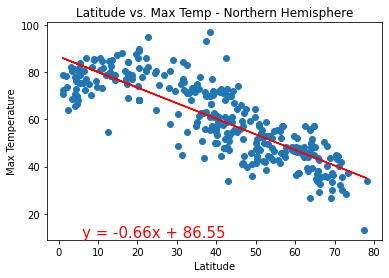

In [107]:
# Add the linear regression equation and line to plot
x_values = northern_hem['Lat']
y_values = northern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Max Temp - Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

The above scatter plot shows a strong, negative coorelation between the latitude of the Northern Hemisphere cities and their respective max temperatures.  The r-value is .68, which means 68% of the variances of data are accounted for by the regression line. Overall, it can be assumed that the further away from the equator (latitude 0), the cooler the max temp. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.568291608095557
y = -0.66x + 86.55


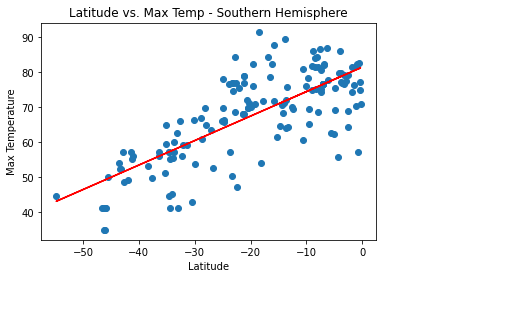

In [108]:
# Add the linear regression equation and line to plot
x_values = southern_hem['Lat']
y_values = southern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Max Temp - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

The scatterplot above is showing that there is a positive coorelation between the Southern Hemisphere Cities' latitude and max temperature.  The r-value is not as strong as in the Northern Hemisphere at only .57, but that means 57% of the data is explained by the regression model. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.005184428651796792
y = 0.07x + 72.09


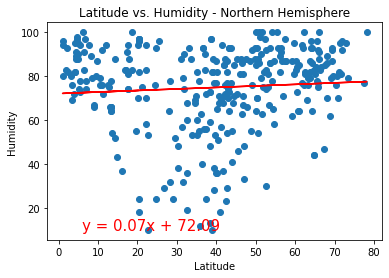

In [109]:
# Add the linear regression equation and line to plot
x_values = northern_hem['Lat']
y_values = northern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Humidity - Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

The above scatterplot is comparing the latitude and the humidity level.  There appears to be no coorelation betweel these values as the r-value is .005.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.006343143084686638
y = 0.07x + 72.09


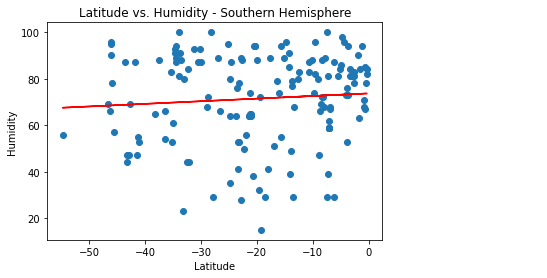

In [110]:
# Add the linear regression equation and line to plot
x_values = southern_hem['Lat']
y_values = southern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Humidity - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

The above scatterplot compares the latitudes and humidities of the Southern Hemisphere cities.  THere is no coorrelation between the data, which is highlighted by the r-value of .006.  Less than 1% of the data is explained by the regression line. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.004925220023729734
y = 0.14x + 44.74


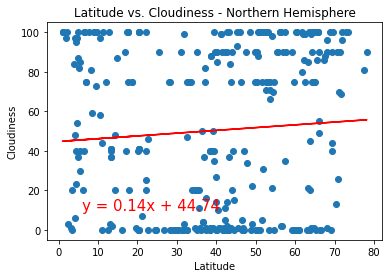

In [111]:
# Add the linear regression equation and line to plot
x_values = northern_hem['Lat']
y_values = northern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness - Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

Above, the scatterplot is showing a comparison of the latitude and the cloud cover percentage.  There appears to be no coorrelation of the data, which can be highlighted by the r-value of .004, meaning less than 1% of the data is explained by the regression line.  In my opinion, there is a high cluster of data at the 100% and 0% coverage mark.  This could be due to the reporting of cloudiness as either "cloudy" or "no clouds", while the middle area of "partly cloudy" or "mostly cloudy" is a less clear when reporting. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.008344432770063862
y = 0.14x + 44.74


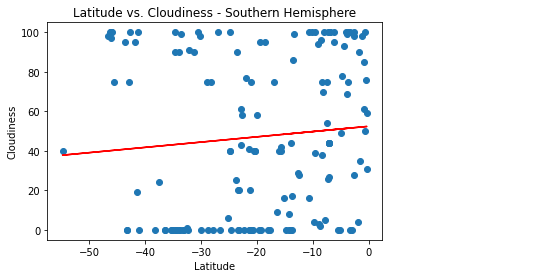

In [112]:
# Add the linear regression equation and line to plot
x_values = southern_hem['Lat']
y_values = southern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

Above, the scatterplot is showing a comparison of the latitude and the cloud cover percentage.  There appears to be no coorrelation of the data, which can be highlighted by the r-value of .004, meaning less than 1% of the data is explained by the regression line.  In my opinion, there is a high cluster of data at the 100% and 0% coverage mark.  This could be due to the reporting of cloudiness as either "cloudy" or "no clouds", while the middle area of "partly cloudy" or "mostly cloudy" is a less clear when reporting. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06964066233223848
y = 0.08x + 4.83


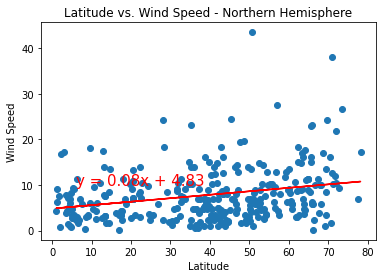

In [113]:
# Add the linear regression equation and line to plot
x_values = northern_hem['Lat']
y_values = northern_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed - Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

The above scatterplot is comparing the latitude and wind speed in the Northern Hemisphere.  The r-value is .06, showing a very weak, positive coorelation .  There is a high cluster of data for all latitudes at the 0-10 mph range, which seems to be a common wind speed.  It can be noted that the outliers of high wind speeds do seem to be at the further latitudes from the equator. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11978004582016105
y = 0.08x + 4.83


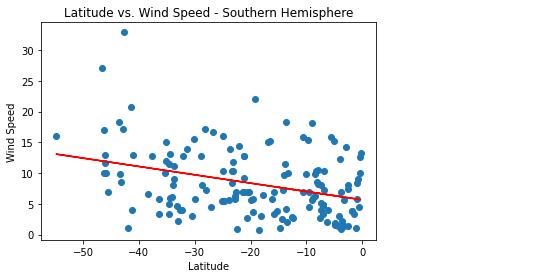

In [114]:
# Add the linear regression equation and line to plot
x_values = southern_hem['Lat']
y_values = southern_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed - Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

The above scatterplot is comparing the latitude and wind speed in the Southern Hemisphere.  The r-value is .11, showing a very weak, negative correlation .  There is a high cluster of data for all latitudes at the 0-15 mph range, which seems to be a common wind speed.  It can be noted that the outliers of high wind speeds do seem to be at the further latitudes from the equator. 